## Fashion MNIST- CNN Model Prediction using Tensorflow, Keras

### Brief Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try.  "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

### Data Description

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix. For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

### Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

### TL;DR

* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

1.9.0


In [2]:
train_df = pd.read_csv("./fashion-mnist_train.csv")
test_df = pd.read_csv("./fashion-mnist_test.csv")

Let explore the train and test data.

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Now it is observed that the first column is the label data and because it has 10 classes so it is going to have from 0 to 9.The remaining columns are the actual pixel data.Here as you can see there are about 784 columns that contain pixel data. Here each row is a different image representation in the form pixel data.

Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.

To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras

In [6]:
train_data = np.array(train_df, dtype='float32')

Similarly let us do the same process for test data

In [7]:
test_data = np.array(test_df, dtype='float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively, i.e.,

* x_train contains all the rows and all columns except the label column and excluding header info.
* y_train contains all the rows and first column and excluding header info.

Similarly slice the test arrays into x and y arrays namely x_test,y_test to store all image data and label data respectively, i.e.,

* x_test contains all the rows and all columns except the label column and excluding header info.
* y_test contains all the rows and first column and excluding header info.

##### Important Note : Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255

In [8]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

Now we are gonna split the training data into validation and actual training data for training the model and testing it using the validation set. This is achieved using the train_test_split method of scikit learn library.

In [9]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

Now let us visualise the sample image how it looks like in 28 * 28 pixel size.

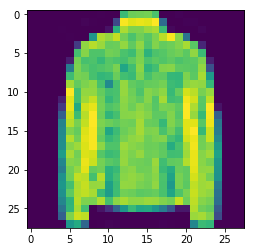

In [10]:
image = x_train[55,:].reshape((28,28))
plt.imshow(image)
plt.show()

As you can see, this is a coat.

In [11]:
y_train[55]

4.0

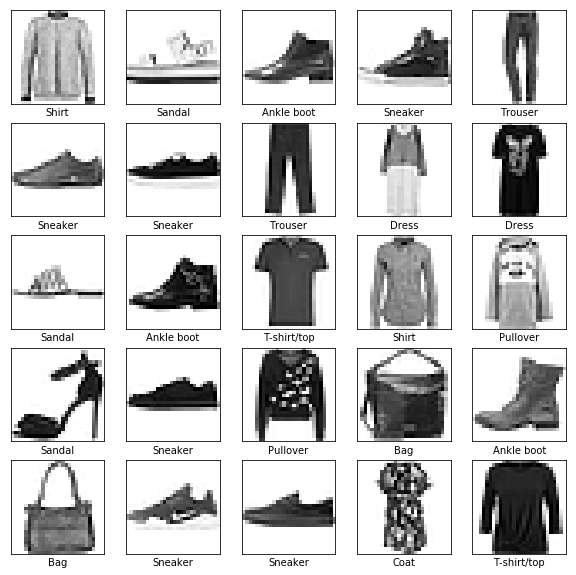

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i,:].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[int(y_train[i])])

In [13]:
x_validate.shape

(12000, 784)

In [14]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

Now we need to do more formating on the x_train, x_test and x_validate sets.

In [15]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [16]:
x_validate.shape

(12000, 28, 28, 1)

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, input_shape=image_shape),
    keras.layers.MaxPooling2D(pool_size=2), # down samling the output instead of 28*28 it is 14*14
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(28,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=50, validation_data=(x_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 22s 462us/step - loss: 0.8066 - acc: 0.7263 - val_loss: 0.5050 - val_acc: 0.8205
Epoch 2/50
48000/48000 [==============================] - 21s 439us/step - loss: 0.4610 - acc: 0.8393 - val_loss: 0.4182 - val_acc: 0.8568
Epoch 3/50
48000/48000 [==============================] - 22s 449us/step - loss: 0.4062 - acc: 0.8597 - val_loss: 0.3860 - val_acc: 0.8684
Epoch 4/50
48000/48000 [==============================] - 22s 456us/step - loss: 0.3772 - acc: 0.8692 - val_loss: 0.3603 - val_acc: 0.8776
Epoch 5/50
48000/48000 [==============================] - 22s 448us/step - loss: 0.3570 - acc: 0.8758 - val_loss: 0.3436 - val_acc: 0.8797
Epoch 6/50
48000/48000 [==============================] - 20s 422us/step - loss: 0.3470 - acc: 0.8794 - val_loss: 0.3528 - val_acc: 0.8749
Epoch 7/50
48000/48000 [==============================] - 20s 409us/step - loss: 0.3342 - acc: 0.8833 - val_loss: 0.

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.95 (or 95%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:',test_acc)
print('Test Loss:',test_loss)

10000/10000 [==============================] - 2s 169us/step
Test Accuracy: 0.9174
Test Loss: 0.24384627891778946


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [21]:
predictions = model.predict(x_test)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [22]:
predictions[0]

array([9.9955553e-01, 1.3295399e-09, 1.5964337e-04, 4.8904494e-05,
       1.2854008e-06, 1.7027492e-14, 2.2859637e-04, 4.8107509e-13,
       6.0736888e-06, 1.3707319e-13], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [23]:
np.argmax(predictions[0])

0

So the model is most confident that this image is an T-shirt/top, or class_names[0]. And we can check the test label to see this is correct:

In [24]:
y_test[0]

0.0

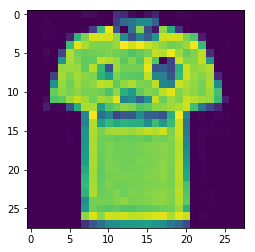

In [25]:
plt.imshow(x_test[0].reshape((28,28)))

### Results

Let's plot training and validation accuracy as well as loss.

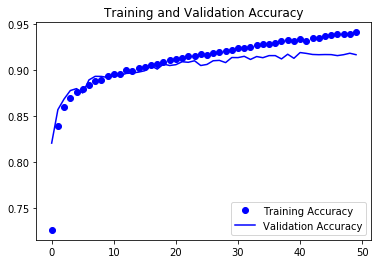

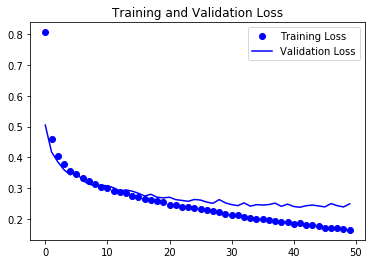

In [26]:
%matplotlib inline
accuracy = model.history.history['acc']
val_accuracy = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo',label='Training Accuracy')
plt.plot(epochs, val_accuracy,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo',label='Training Loss')
plt.plot(epochs, val_loss,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()